# Outline

SKLearn Diabetes Dataset.

In [1]:
import numpy as np

import pandas as pd

import sklearn
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
diabetes_ds = datasets.load_diabetes(return_X_y=False, as_frame=True)
dir(diabetes_ds)

['DESCR',
 'data',
 'data_filename',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [3]:
print(diabetes_ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

## Target Values:

In [4]:
print("Target shape: ", diabetes_ds.target.shape)
print("Target dtype: ", diabetes_ds.target.dtype)

Target shape:  (442,)
Target dtype:  float64


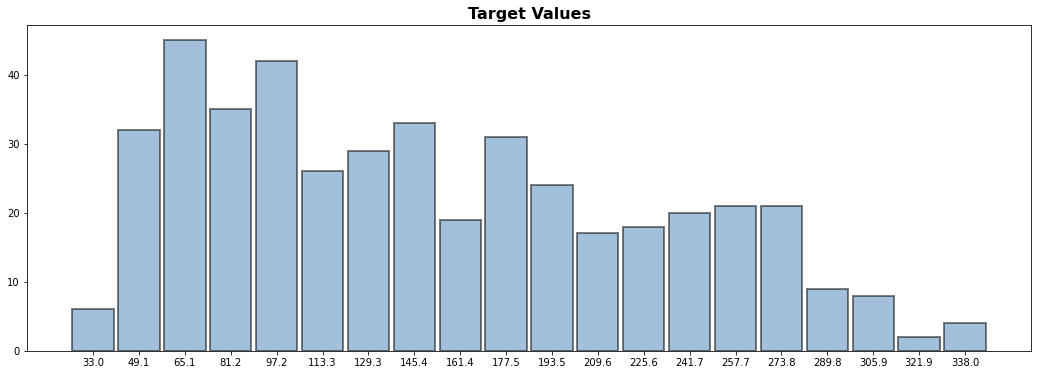

In [5]:
fig = plt.figure(figsize=(18., 6.))
plt.title("Target Values", fontsize=16, fontweight="bold")
_, bins, _ = plt.hist(
    diabetes_ds.target, bins=20, rwidth=0.9, align="mid",
    color="steelblue", edgecolor="black", linewidth=2.0, alpha=0.5)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers)
plt.show()

## Features:

In [6]:
display(diabetes_ds.data.sample(10))
display(diabetes_ds.data.describe())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
22,-0.085430,-0.044642,-0.004050,-0.009113,-0.002945,0.007767,0.022869,-0.039493,-0.061177,-0.013504
415,-0.005515,-0.044642,0.008883,-0.050428,0.025950,0.047224,-0.043401,0.071210,0.014823,0.003064
139,0.023546,-0.044642,0.061696,0.052858,-0.034592,-0.048912,-0.028674,-0.002592,0.054724,-0.005220
33,0.030811,-0.044642,-0.050396,-0.002228,-0.044223,-0.089935,0.118591,-0.076395,-0.018118,0.003064
153,0.041708,0.050680,-0.043929,0.063187,-0.004321,0.016222,-0.013948,-0.002592,-0.034524,0.011349
163,0.016281,0.050680,0.072474,0.076958,-0.008449,0.005575,-0.006584,-0.002592,-0.023645,0.061054
143,-0.030942,-0.044642,0.005650,-0.009113,0.019070,0.006828,0.074412,-0.039493,-0.041180,-0.042499
46,-0.056370,-0.044642,-0.011595,-0.033214,-0.046975,-0.047660,0.004460,-0.039493,-0.007979,-0.088062
130,-0.063635,0.050680,0.096186,0.104501,-0.002945,-0.004759,-0.006584,-0.002592,0.022692,0.073480
291,0.074401,-0.044642,0.018584,0.063187,0.061725,0.042840,0.008142,-0.002592,0.058039,-0.059067


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


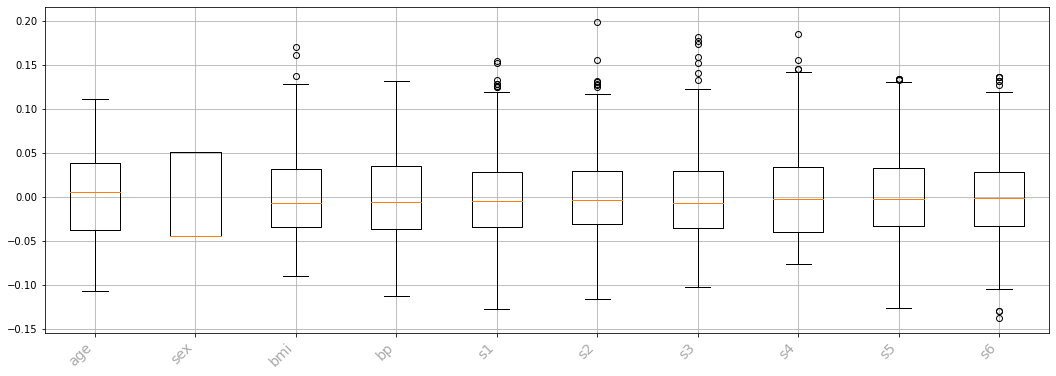

In [7]:
fig = plt.figure(figsize=(18., 6.))
plt.boxplot(diabetes_ds.data.to_numpy())
column_names = diabetes_ds.data.columns
_ticks = 1 + np.arange(len(column_names))
plt.xticks(_ticks, column_names, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.grid()
plt.gca().set_axisbelow(True)
#plt.yscale("log")
plt.show()

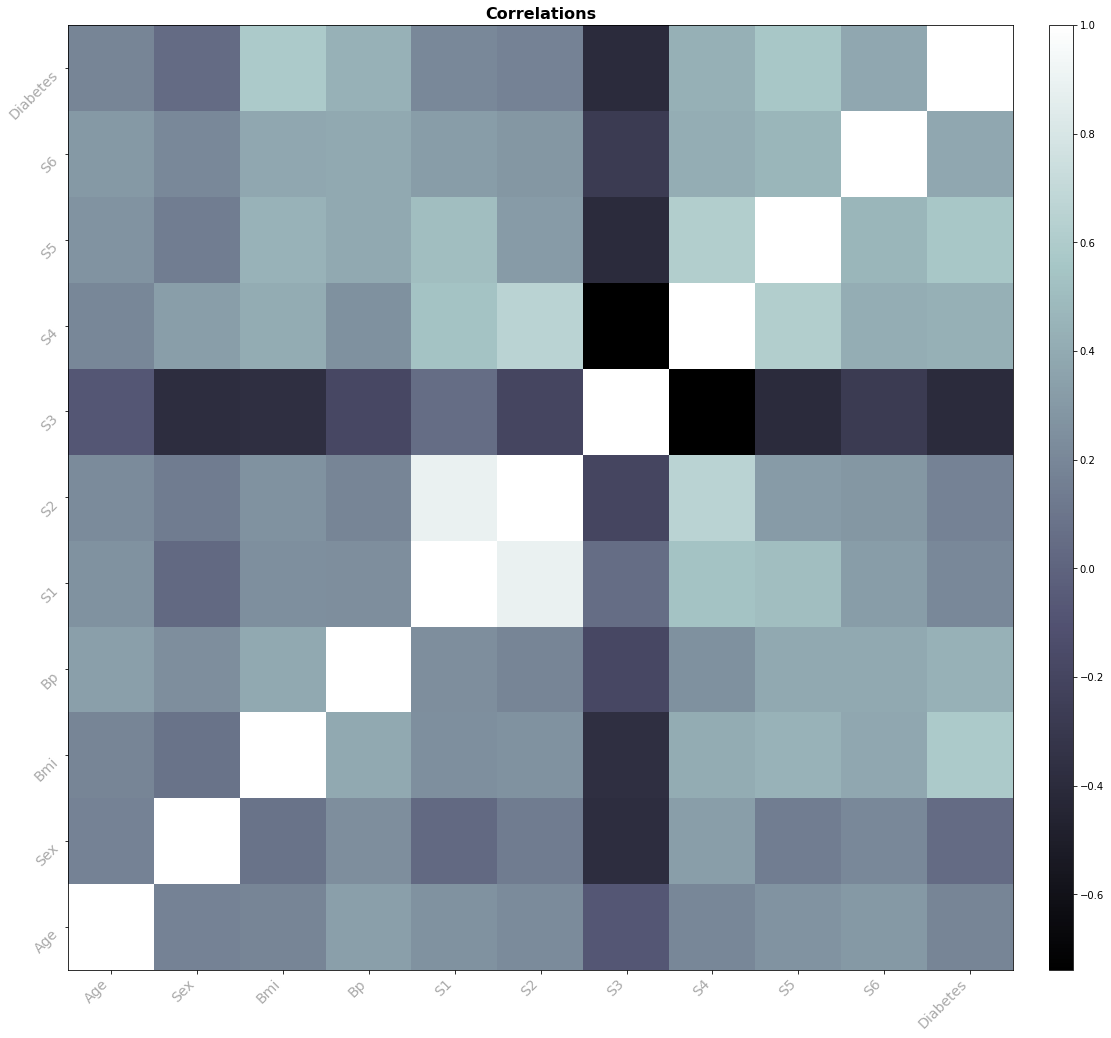

In [8]:
expanded_ds = diabetes_ds.data.copy()
expanded_ds["diabetes"] = diabetes_ds.target
corr_mat = expanded_ds.corr()

_ticks = np.arange(corr_mat.shape[0])
_labels = [name.title() for name in expanded_ds.columns]

fig = plt.figure(figsize=(18., 18.))
#
plt.title("Correlations", fontsize=16, fontweight="bold")
im = plt.imshow(corr_mat, cmap="bone", origin="lower")
plt.xticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
plt.yticks(_ticks, _labels, rotation=45, ha="right", va="top", fontsize=14, color="darkgray")
divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", size="2.5%", pad=0.5)
plt.colorbar(im, cax=cax)
#
plt.show()

<br><br><br>

# Regression Models

In [9]:
X = diabetes_ds.data.to_numpy() 
y = diabetes_ds.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Linear Regression

In [10]:
regression_model = LinearRegression(
    fit_intercept=True)

regression_model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_train_pred = regression_model.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print("Train Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Train Set: 
	RMSE: 54.307
	R2:   0.51


In [12]:
y_test_pred = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Test Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Test Set: 
	RMSE: 53.083
	R2:   0.51


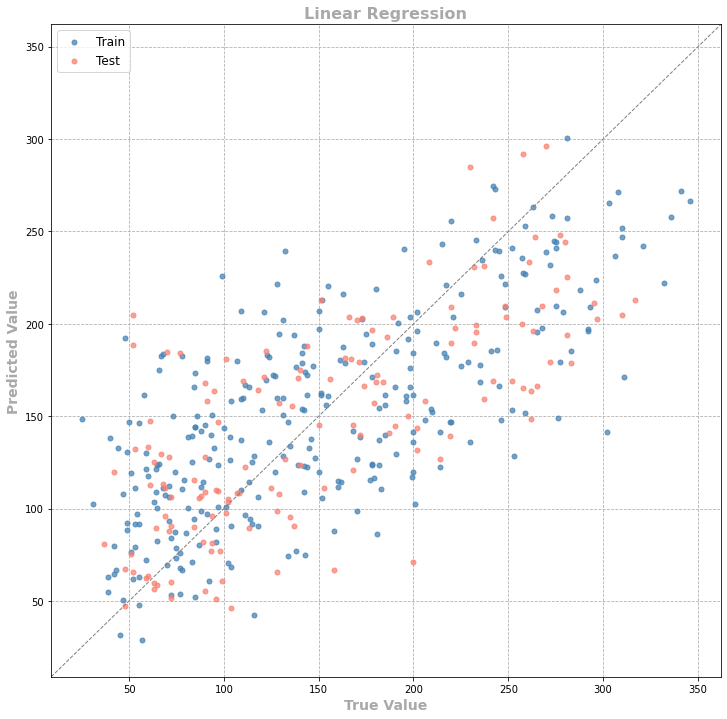

In [13]:
fig = plt.figure(figsize=(12., 12.))
plt.title("Linear Regression", fontsize=16, fontweight="bold", color="darkgray")
plt.xlabel("True Value", fontsize=14, fontweight="bold", color="darkgray")
plt.ylabel("Predicted Value", fontsize=14, fontweight="bold", color="darkgray")
plt.scatter(y_train, y_train_pred, s=25.0, color="steelblue", alpha=0.75, label="Train")
plt.scatter(y_test, y_test_pred, s=25.0, color="salmon", alpha=0.75, label="Test")
x_lim = plt.gca().get_xlim()
y_lim = plt.gca().get_ylim()
xy_range = (min(x_lim[0], y_lim[0]), max(x_lim[1], y_lim[1]))
plt.plot(xy_range, xy_range, ls="--", lw=1.0, color="gray")
plt.xlim(xy_range)
plt.ylim(xy_range)
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.legend(loc="upper left", fontsize=12)
plt.show()

## Support Vector Regression:

In [14]:
regression_model = SVR(
    kernel="poly", degree=1, gamma='scale', coef0=0.0, tol=0.001, 
    C=1000.0, epsilon=50.0, shrinking=True, cache_size=200, verbose=False, max_iter=-1)

regression_model.fit(X_train, y_train)

SVR(C=1000.0, degree=1, epsilon=50.0, kernel='poly')

In [15]:
y_train_pred = regression_model.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print("Train Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Train Set: 
	RMSE: 54.953
	R2:   0.498


In [16]:
y_test_pred = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Test Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Test Set: 
	RMSE: 53.425
	R2:   0.504


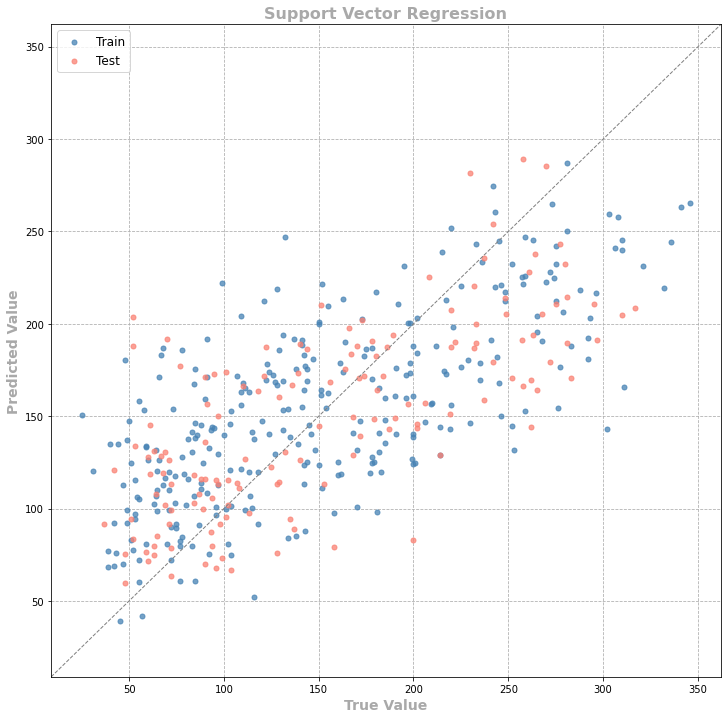

In [17]:
fig = plt.figure(figsize=(12., 12.))
plt.title("Support Vector Regression", fontsize=16, fontweight="bold", color="darkgray")
plt.xlabel("True Value", fontsize=14, fontweight="bold", color="darkgray")
plt.ylabel("Predicted Value", fontsize=14, fontweight="bold", color="darkgray")
plt.scatter(y_train, y_train_pred, s=25.0, color="steelblue", alpha=0.75, label="Train")
plt.scatter(y_test, y_test_pred, s=25.0, color="salmon", alpha=0.75, label="Test")
x_lim = plt.gca().get_xlim()
y_lim = plt.gca().get_ylim()
xy_range = (min(x_lim[0], y_lim[0]), max(x_lim[1], y_lim[1]))
plt.plot(xy_range, xy_range, ls="--", lw=1.0, color="gray")
plt.xlim(xy_range)
plt.ylim(xy_range)
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.legend(loc="upper left", fontsize=12)
plt.show()

## Random Forest Regression:

In [18]:
regression_model = RandomForestRegressor(
    n_estimators=100,
    criterion='mse', 
    max_depth=4, 
    min_samples_split=10, 
    min_samples_leaf=6, 
    min_weight_fraction_leaf=0.0, 
    max_features='auto', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    min_impurity_split=None, 
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None, 
    random_state=None, 
    verbose=0, 
    warm_start=False, 
    ccp_alpha=0.0, 
    max_samples=None)

regression_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=10)

In [19]:
y_train_pred = regression_model.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print("Train Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Train Set: 
	RMSE: 46.562
	R2:   0.64


In [20]:
y_test_pred = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Test Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Test Set: 
	RMSE: 54.599
	R2:   0.482


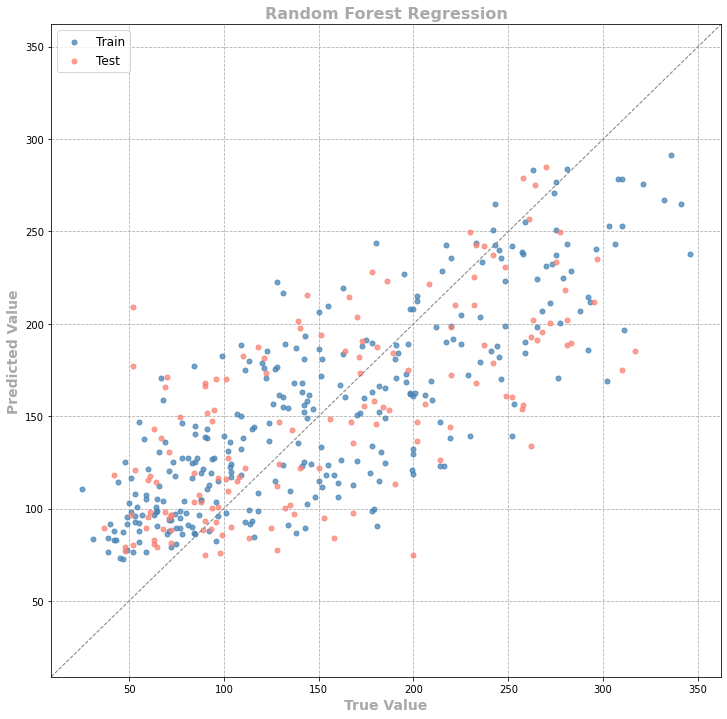

In [21]:
fig = plt.figure(figsize=(12., 12.))
plt.title("Random Forest Regression", fontsize=16, fontweight="bold", color="darkgray")
plt.xlabel("True Value", fontsize=14, fontweight="bold", color="darkgray")
plt.ylabel("Predicted Value", fontsize=14, fontweight="bold", color="darkgray")
plt.scatter(y_train, y_train_pred, s=25.0, color="steelblue", alpha=0.75, label="Train")
plt.scatter(y_test, y_test_pred, s=25.0, color="salmon", alpha=0.75, label="Test")
x_lim = plt.gca().get_xlim()
y_lim = plt.gca().get_ylim()
xy_range = (min(x_lim[0], y_lim[0]), max(x_lim[1], y_lim[1]))
plt.plot(xy_range, xy_range, ls="--", lw=1.0, color="gray")
plt.xlim(xy_range)
plt.ylim(xy_range)
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<br><br><br>

# Use a DNN for Regression

## Normalize Features:

In [22]:
X = diabetes_ds.data.to_numpy() # Using all of the data:
y = diabetes_ds.target

# Normalize X:
X = X - np.mean(X, axis=0)[np.newaxis, :]
X = X / np.std(X, axis=0)[np.newaxis, :]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## Construct Model:

In [23]:
inputs = tf.keras.Input(shape=(10,), name="features")
x = tf.keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = tf.keras.layers.Dense(16, activation="relu", name="dense_2")(x)
outputs = tf.keras.layers.Dense(1, activation="linear", name="predictions")(x)

regression_model = tf.keras.Model(inputs=inputs, outputs=outputs, name="regression_model")

regression_model.summary()

Model: "regression_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
predictions (Dense)          (None, 1)                 17        
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


## Compile and Fit Model:

In [24]:
optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
loss = tf.keras.losses.MSE

regression_model.compile(
    optimizer=optimizer, loss=loss, metrics=[])

In [25]:
regression_model.fit(
    X_train,
    y_train,
    batch_size=4,
    epochs=20,
    shuffle=True)

Epoch 1/20
74/74 [==============================] - 0s 526us/step - loss: 31101.3548
Epoch 2/20
74/74 [==============================] - 0s 495us/step - loss: 28180.6853
Epoch 3/20
74/74 [==============================] - 0s 504us/step - loss: 23562.8126
Epoch 4/20
74/74 [==============================] - 0s 500us/step - loss: 15231.1836
Epoch 5/20
74/74 [==============================] - 0s 484us/step - loss: 6836.9988
Epoch 6/20
74/74 [==============================] - 0s 486us/step - loss: 4538.1388
Epoch 7/20
74/74 [==============================] - 0s 494us/step - loss: 4544.8988
Epoch 8/20
74/74 [==============================] - 0s 492us/step - loss: 3772.2699
Epoch 9/20
74/74 [==============================] - 0s 486us/step - loss: 3702.6456
Epoch 10/20
74/74 [==============================] - 0s 491us/step - loss: 3749.3565
Epoch 11/20
74/74 [==============================] - 0s 489us/step - loss: 3470.4336
Epoch 12/20
74/74 [==============================] - 0s 485us/step - l

In [26]:
y_train_pred = regression_model.predict(X_train)
rmse = mean_squared_error(y_train, y_train_pred, squared=False)
r2 = r2_score(y_train, y_train_pred)

print("Train Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Train Set: 
	RMSE: 53.308
	R2:   0.528


In [27]:
y_test_pred = regression_model.predict(X_test)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Test Set: ")
print(f"\tRMSE: {round(float(rmse), 3)}")
print(f"\tR2:   {round(float(r2), 3)}")

Test Set: 
	RMSE: 56.571
	R2:   0.444


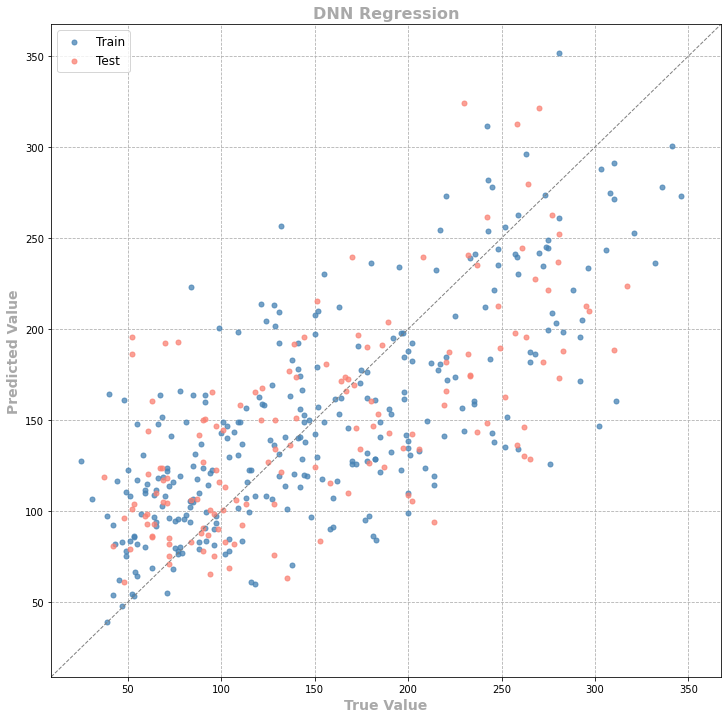

In [28]:
fig = plt.figure(figsize=(12., 12.))
plt.title("DNN Regression", fontsize=16, fontweight="bold", color="darkgray")
plt.xlabel("True Value", fontsize=14, fontweight="bold", color="darkgray")
plt.ylabel("Predicted Value", fontsize=14, fontweight="bold", color="darkgray")
plt.scatter(y_train, y_train_pred, s=25.0, color="steelblue", alpha=0.75, label="Train")
plt.scatter(y_test, y_test_pred, s=25.0, color="salmon", alpha=0.75, label="Test")
x_lim = plt.gca().get_xlim()
y_lim = plt.gca().get_ylim()
xy_range = (min(x_lim[0], y_lim[0]), max(x_lim[1], y_lim[1]))
plt.plot(xy_range, xy_range, ls="--", lw=1.0, color="gray")
plt.xlim(xy_range)
plt.ylim(xy_range)
plt.grid(ls="--")
plt.gca().set_axisbelow(True)
plt.legend(loc="upper left", fontsize=12)
plt.show()